<a href="https://colab.research.google.com/github/DristantaNirola/Airline_Passenger_referral_Prediction/blob/main/Airline_Passenger_referral_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement:
Data includes airline reviews from 2006 to 2019 for popular airlines around the world with multiple choice and free text questions. Data is scraped in Spring 2019. The main objective is to predict whether passengers will refer the airline to their friends.

Feature descriptions briefly as follows:
airline: Name of the airline.  
overall: Overall point is given to the trip between 1 to 10.  
author: Author of the trip  
reviewdate: Date of the Review customer review: Review of the customers in free text format  
aircraft: Type of the aircraft  
travellertype: Type of traveler (e.g. business, leisure)  
cabin: Cabin at the flight date flown: Flight date  
seatcomfort: Rated between 1-5  
cabin service: Rated between 1-5  
foodbev: Rated between 1-5 entertainment: Rated between 1-5  
groundservice: Rated between 1-5  
valueformoney: Rated between 1-5  
recommended: Binary, target variable.  

# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#2. Loading the Dataset

In [4]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Reading the xlsx file from the drive
data= pd.read_excel('/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Module 5/Week 2/Day 1/data_airline_reviews.xlsx')

In [8]:
# Shape of the data
data.shape

(131895, 17)

In [62]:
# First 10 row 
data.head(10)

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Turkish Airlines,3.0,M Galerko,7th May 2019,âœ… Trip Verified | Rome to Prishtina via Ista...,NaN,Business,Economy Class,Rome to Prishtina via Istanbul,2019-05-01 00:00:00,1.0,4.0,1.0,3.0,1.0,2.0,no
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Turkish Airlines,1.0,Pooja Jain,6th May 2019,âœ… Trip Verified | Mumbai to Dublin via Istan...,NaN,Solo Leisure,Economy Class,Mumbai to Dublin via Istanbul,2019-05-01 00:00:00,1.0,1.0,1.0,1.0,1.0,1.0,no


## Conclusion:   
1) Shape of the dataset is (131895, 17)  
2) Every alternative row in the dataset has all NaN values.

#3. Data Cleaning and Imputations:

## 3.1. Removing the rows with all NaN values.

In [65]:
# Removing the columns with all NaN values.
data.dropna(how='all', inplace=True)

In [66]:
# Shape of the dataset after alternative col removal
data.shape

(65947, 17)

In [68]:
# Checking the null values in each of the columns 
data.isna().sum()

airline                0
overall             1930
author                 0
review_date            0
customer_review        0
aircraft           46229
traveller_type     26192
cabin               2644
route              26221
date_flown         26314
seat_comfort        5266
cabin_service       5232
food_bev           13339
entertainment      21754
ground_service     26589
value_for_money     1972
recommended         1507
dtype: int64

##3.2. Removing duplicate values

In [74]:
data[data.duplicated()]

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
2183,Turkish Airlines,8.0,Perrin Michel,19th March 2015,LIS-IST B737-800. Check in OK. Flight on Time....,NaN,NaN,Business Class,NaN,NaN,4.0,5.0,4.0,3.0,NaN,4.0,yes
2221,Turkish Airlines,1.0,P James,24th February 2015,BKK-IST-ARN on A330 and then A321. Flight from...,NaN,NaN,Business Class,NaN,NaN,5.0,3.0,4.0,4.0,NaN,1.0,no
2263,Turkish Airlines,1.0,C Cheong,19th January 2015,Flew back with TK 1955 business class from Ist...,NaN,NaN,Business Class,NaN,NaN,1.0,4.0,2.0,1.0,NaN,1.0,no
2281,Turkish Airlines,7.0,Hagar Shimoni,11th January 2015,We flew a family of 6 CGK-TLV and TLV-AMS all ...,NaN,NaN,Economy Class,NaN,NaN,3.0,3.0,4.0,4.0,NaN,4.0,yes
2341,Turkish Airlines,1.0,Nick Kambounias,28th October 2014,My recent flight on Turkish Airlines was with ...,NaN,NaN,Economy Class,NaN,NaN,5.0,2.0,5.0,5.0,NaN,2.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128450,Norwegian,2.0,S Rasmussen,28th August 2014,Flew VNO-ARN-CPH. First sector VNO to ARN I co...,NaN,NaN,Economy Class,NaN,NaN,3.0,1.0,NaN,1.0,NaN,2.0,no
128506,Norwegian,NaN,Scott Sarem,3rd August 2014,DY7091 July 1 2014. when we boarded the plane ...,NaN,NaN,Economy Class,NaN,NaN,2.0,1.0,1.0,1.0,NaN,1.0,no
128530,Norwegian,9.0,S Hollenbeck,27th July 2014,My son and I flew no frills with carry-on Oakl...,NaN,NaN,Economy Class,NaN,NaN,4.0,4.0,NaN,5.0,NaN,4.0,yes
128546,Norwegian,NaN,L Watson,13th July 2014,This is by the far the worst airline I have fl...,NaN,NaN,Economy Class,NaN,NaN,3.0,4.0,3.0,1.0,NaN,1.0,no


In [30]:
data.recommended.value_counts()

no     33894
yes    30546
Name: recommended, dtype: int64

## 2.3. Imputation of the dependent variable:

In [19]:
sub_df= data[['overall','recommended']]

In [20]:
sub_df.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
sub_df.shape

(62530, 2)

In [22]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


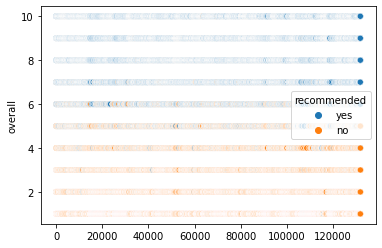

In [23]:
sns.scatterplot(sub_df.index,y=sub_df.overall,hue=sub_df.recommended)

In [ ]:
predict = ['yes' if x > 5 for x in fruits if "a" in x]

In [58]:
def target(x):
  if x> 9.5:
    return 'yes'
  else:
    return 'no'

In [60]:
pred= [target(x) for x in sub_df.overall]

In [46]:
sum(sub_df.recommended==pred)

54791

In [39]:
sub_df.shape

(62530, 2)

In [40]:
59692/62530

0.9546137853830161

In [59]:
from sklearn.metrics import confusion_matrix

In [61]:
confusion_matrix(sub_df.recommended,pred)

array([[31951,    39],
       [22190,  8350]])